In [53]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [54]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [55]:
batch_size = 32
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)
classes = ["airplane", "automobile", "bird", "cat", "deer",
           "dog", "frog", "horse", "ship", "truck"]

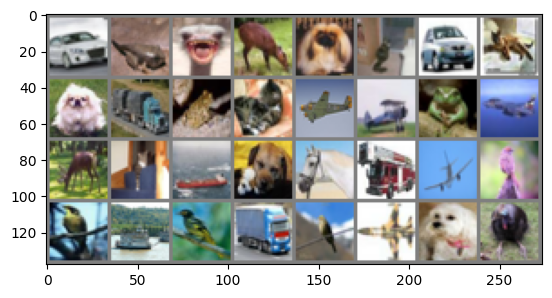

Labels: ['automobile', 'frog', 'bird', 'deer', 'dog', 'cat', 'automobile', 'cat']


In [56]:
dataiter = iter(trainloader)
images, labels = next(dataiter)
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

imshow(torchvision.utils.make_grid(images))
print("Labels:", [classes[labels[j]] for j in range(8)])

In [62]:
import torch
import torch.nn as nn
import torch.optim as optim

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(128 * 4 * 4, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = self.relu(self.conv3(x))
        x = self.pool(x)
        x = x.view(-1, 128 * 4 * 4)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x
model = CNN()
print(model)
params = list(model.parameters())
print(f"Number of parameters: {len(params)}")




CNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=2048, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU()
)
Number of parameters: 10


In [63]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [77]:

epochs = 10

for epoch in range(epochs):
    running_loss = 0.0
    model.train()
    print(f"🚀 Starting epoch {epoch+1}/{epochs}")
    for i, (images, labels) in enumerate(trainloader):
      if i>5:
        print("fffff")
        break
      print(f"🔄 Processing batch {i+1}/{len(trainloader)}...")

      images, labels = images.to(device), labels.to(device)
      optimizer.zero_grad()
      outputs = model(images)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()

      running_loss += loss.item()

    print(f"✅ Epoch {epoch+1}/{epochs} completed! Loss: {running_loss/len(trainloader):.4f}")

print("🎉 Training Finished!")

print(f"Expected number of batches: {len(trainloader)}")

🚀 Starting epoch 1/10
🔄 Processing batch 1/1563...
🔄 Processing batch 2/1563...
🔄 Processing batch 3/1563...
🔄 Processing batch 4/1563...
🔄 Processing batch 5/1563...
🔄 Processing batch 6/1563...
fffff
✅ Epoch 1/10 completed! Loss: 0.0009
🚀 Starting epoch 2/10
🔄 Processing batch 1/1563...
🔄 Processing batch 2/1563...
🔄 Processing batch 3/1563...
🔄 Processing batch 4/1563...
🔄 Processing batch 5/1563...
🔄 Processing batch 6/1563...
fffff
✅ Epoch 2/10 completed! Loss: 0.0013
🚀 Starting epoch 3/10
🔄 Processing batch 1/1563...
🔄 Processing batch 2/1563...
🔄 Processing batch 3/1563...
🔄 Processing batch 4/1563...
🔄 Processing batch 5/1563...
🔄 Processing batch 6/1563...
fffff
✅ Epoch 3/10 completed! Loss: 0.0007
🚀 Starting epoch 4/10
🔄 Processing batch 1/1563...
🔄 Processing batch 2/1563...
🔄 Processing batch 3/1563...
🔄 Processing batch 4/1563...
🔄 Processing batch 5/1563...
🔄 Processing batch 6/1563...
fffff
✅ Epoch 4/10 completed! Loss: 0.0013
🚀 Starting epoch 5/10
🔄 Processing batch 1/1

In [78]:
correct = 0
total = 0
with torch.no_grad():
    for images, labels in testloader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")

Test Accuracy: 75.79%


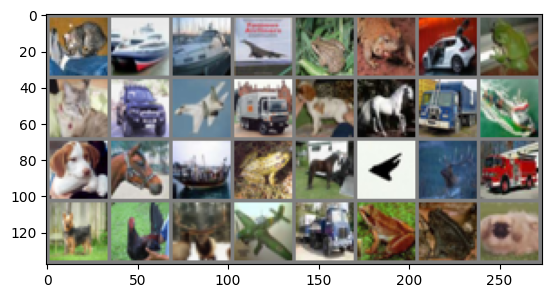

Predicted: ['cat', 'ship', 'ship', 'airplane', 'frog', 'frog', 'automobile', 'bird']


In [83]:
dataiter = iter(testloader)
images, labels = next(dataiter)
outputs = model(images)
_, predicted = torch.max(outputs, 1)
imshow(torchvision.utils.make_grid(images))
print("Predicted:", [classes[predicted[j]] for j in range(8)])